In [1]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# Read the csv files containin the tweets by Elon Musk from 2010 to 2022 for Tesla.
tesla_txtblob = pd.read_csv('Resources/tesla_txtblob.csv')
tesla_price = pd.read_csv('Resources/tesla_price.csv')
tesla_vader = pd.read_csv('Resources/tesla_vader.csv')

In [3]:
tesla_txtblob

,Unnamed: 0,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN,0.233333,-0.125000,Negative
1,1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN,0.650000,0.350000,Positive
2,2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN,0.333333,0.250000,Positive
3,3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN,0.500000,0.175000,Positive
4,4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN,0.435000,0.150000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1481,2022-03-03,"By the way, Tesla factory worker compensation ...",5478.0,NaN,NaN,NaN,215.0,591.0,0.000000,0.000000,Neutral
1482,1482,2022-03-03,This old YouTube clip helps explain why former...,3387.0,NaN,NaN,NaN,220.0,450.0,0.366667,-0.033333,Negative
1483,1483,2022-03-03,Our real challenge is Bay Area has negative un...,6839.0,NaN,NaN,NaN,384.0,719.0,0.429167,0.233333,Positive
1484,1484,2022-03-05,"Obviously, this would negatively affect Tesla,...",155206.0,NaN,NaN,NaN,4090.0,16131.0,0.314286,-0.075000,Negative


In [4]:
tesla_txtblob = tesla_txtblob.drop(tesla_txtblob.columns[[0]], axis=1)

In [5]:
tesla_txtblob

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN,0.233333,-0.125000,Negative
1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN,0.650000,0.350000,Positive
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN,0.333333,0.250000,Positive
3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN,0.500000,0.175000,Positive
4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN,0.435000,0.150000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
1481,2022-03-03,"By the way, Tesla factory worker compensation ...",5478.0,NaN,NaN,NaN,215.0,591.0,0.000000,0.000000,Neutral
1482,2022-03-03,This old YouTube clip helps explain why former...,3387.0,NaN,NaN,NaN,220.0,450.0,0.366667,-0.033333,Negative
1483,2022-03-03,Our real challenge is Bay Area has negative un...,6839.0,NaN,NaN,NaN,384.0,719.0,0.429167,0.233333,Positive
1484,2022-03-05,"Obviously, this would negatively affect Tesla,...",155206.0,NaN,NaN,NaN,4090.0,16131.0,0.314286,-0.075000,Negative


In [6]:
tesla_price = tesla_price.drop(tesla_price.columns[[0]], axis=1)

In [7]:
tesla_price.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [8]:
tesla_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3030 non-null   object 
 1   Open       3030 non-null   float64
 2   High       3030 non-null   float64
 3   Low        3030 non-null   float64
 4   Close      3030 non-null   float64
 5   Adj Close  3030 non-null   float64
 6   Volume     3030 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.8+ KB


In [9]:
tesla_price.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
tesla_price['Date'] = pd.to_datetime(tesla_price['Date'], format='%Y-%m-%d')['Date'] = pd.to_datetime(tesla_price['Date'], format='%Y-%m-%d')

In [11]:
tesla2019 = tesla_txtblob.loc[(tesla_txtblob['Date'] >= '2019-01-01')
                     & (tesla_txtblob['Date'] < '2019-12-31')]
tesla2019.tail(60)

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
995,2019-10-02,"Thanks, Tesla team is the strongest it’s ever ...",NaN,3392.0,98.0,198.0,NaN,NaN,0.550000,0.475000,Positive
996,2019-10-02,"Over 550,000 Tesla Smart Summon uses in first ...",NaN,46577.0,1351.0,1957.0,NaN,NaN,0.358730,0.071429,Positive
997,2019-10-06,Customized horn &amp; movement sounds (coconut...,NaN,44088.0,1943.0,2410.0,NaN,NaN,0.000000,0.000000,Neutral
998,2019-10-09,Tesla software V10.0 comes with karaoke 🎤,NaN,53896.0,1318.0,3772.0,NaN,NaN,0.000000,0.000000,Neutral
999,2019-10-10,Fundamental metric of good of Tesla is how man...,NaN,1821.0,154.0,225.0,NaN,NaN,0.408333,0.400000,Positive
1000,2019-10-10,Also adding Tesla Solar to our Supercharger st...,NaN,19773.0,441.0,1112.0,NaN,NaN,0.766667,0.188889,Positive
1001,2019-10-10,All Tesla Supercharger stations in regions aff...,NaN,26923.0,627.0,1510.0,NaN,NaN,0.050000,-0.100000,Negative
1002,2019-10-12,Get Tesla Solar plus Powerwall battery for 24/...,NaN,23365.0,1273.0,2261.0,NaN,NaN,0.600000,0.027083,Positive
1003,2019-10-12,"Now that Tesla V10.0 with Smart Summon is out,...",NaN,13795.0,1013.0,708.0,NaN,NaN,0.596429,0.282143,Positive
1004,2019-10-12,V important: pure solar subscription is guaran...,NaN,3656.0,172.0,282.0,NaN,NaN,0.380000,0.062857,Positive


In [12]:
tesla2019[tesla2019["Sentiment"] == "Positive"]["Tweet"]

810      Sounds great, will connect you with Tesla Energy
811                             Great work by Tesla Team!
814     Btw, you can buy a Tesla online in less than 2...
816     Tesla *with* Autopilot engaged is twice as saf...
817     Teslarati is very thoughtful &amp; well-writte...
                              ...                        
1047    Direct drive using several Tesla Plaid motors ...
1050    Tesla merch def needs some love, but too many ...
1052    Tesla app based payment will soon be rolled ou...
1053              Amazing work by Tesla China team!! ❤️❤️
1054    Tesla uses that to wirebond cells to module cu...
Name: Tweet, Length: 153, dtype: object

In [13]:
tesla_price2019 = tesla_price.loc[(tesla_price['Date'] >= '2019-01-01')
                     & (tesla_price['Date'] < '2019-12-31')]
tesla_price2019.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
2333,2019-10-04,46.321999,46.956001,45.613998,46.285999,46.285999,39975000
2334,2019-10-07,45.959999,47.712002,45.709999,47.543999,47.543999,40321000
2335,2019-10-08,47.174000,48.787998,46.900002,48.009998,48.009998,43391000
2336,2019-10-09,48.264000,49.459999,48.130001,48.905998,48.905998,34472000
2337,2019-10-10,49.056000,49.855999,48.316002,48.948002,48.948002,31416500
2338,2019-10-11,49.430000,50.216000,49.362000,49.577999,49.577999,42377000
2339,2019-10-14,49.580002,51.709999,49.425999,51.391998,51.391998,51025000
2340,2019-10-15,51.540001,52.000000,50.824001,51.577999,51.577999,32164000
2341,2019-10-16,51.478001,52.419998,51.383999,51.950001,51.950001,33420500
2342,2019-10-17,52.500000,52.956001,52.034000,52.394001,52.394001,23846500


In [14]:
tesla_price2019["Date"].dt.month

2142     1
2143     1
2144     1
2145     1
2146     1
        ..
2388    12
2389    12
2390    12
2391    12
2392    12
Name: Date, Length: 251, dtype: int64

Text(2019-01-03 00:00:00, 0.00225, 'Great work by Tesla Team!\t')

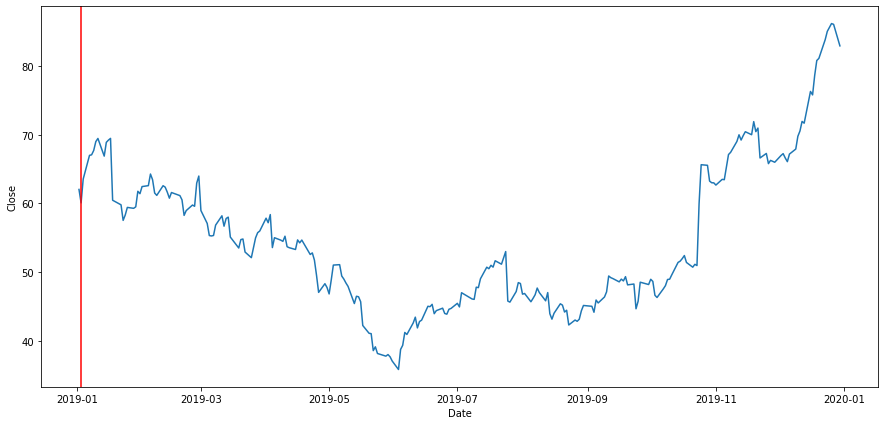

In [15]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=tesla_price2019["Date"], y=tesla_price2019["Close"])
x = pd.Timestamp('2019-01-03')
plt.axvline(x,color='r')
ax.annotate('Great work by Tesla Team!	', xy =(x, 0.00225),xytext =(x,0.00225))

<AxesSubplot:xlabel='Date', ylabel='Volume'>

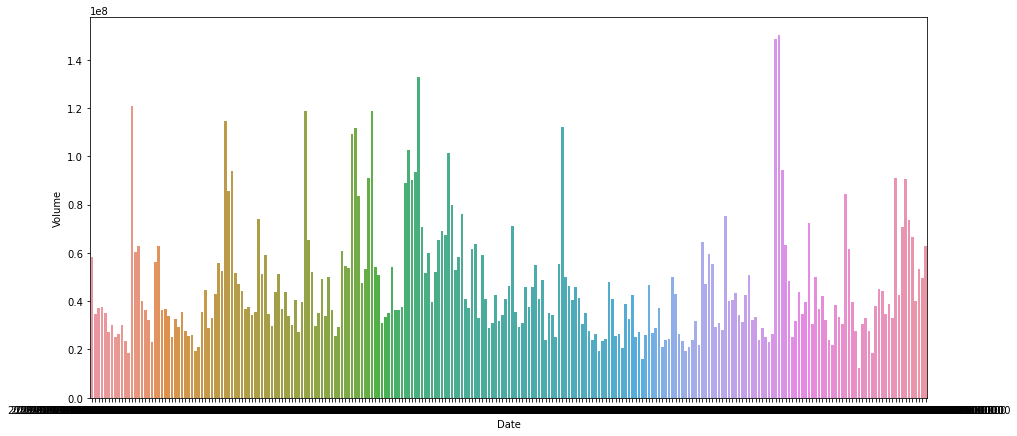

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(x=tesla_price2019["Date"], y=tesla_price2019["Volume"])

In [17]:
tesla2020 = tesla_txtblob.loc[(tesla_txtblob['Date'] >= '2020-01-01')
                     & (tesla_txtblob['Date'] < '2020-12-31')]
tesla2020

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
1056,2020-01-01,Congratulations Tesla &amp; SpaceX on great 20...,NaN,156749.0,1998.0,7376.0,NaN,NaN,0.575000,0.550000,Positive
1057,2020-01-07,At Tesla Giga Shanghai NSFW!!,NaN,286913.0,6713.0,33458.0,NaN,NaN,0.000000,0.000000,Neutral
1058,2020-01-08,♥️♥️ Tesla China Team ♥️♥️ Such amazing progre...,NaN,88574.0,1517.0,2761.0,NaN,NaN,0.700000,0.468750,Positive
1059,2020-01-12,Teslas will soon talk to people if you want. T...,NaN,150299.0,3172.0,13452.0,NaN,NaN,0.300000,0.200000,Positive
1060,2020-01-15,Just saw this today. Tesla refunds in general ...,NaN,12494.0,336.0,243.0,NaN,NaN,0.634921,0.232540,Positive
...,...,...,...,...,...,...,...,...,...,...,...
1239,2020-12-25,"Engineering, design &amp; general company oper...",NaN,2532.0,216.0,154.0,NaN,NaN,0.582407,0.031481,Positive
1240,2020-12-27,Try playing Polytopia in your Tesla! Great gam...,NaN,148037.0,5355.0,4186.0,NaN,NaN,0.575000,0.200000,Positive
1241,2020-12-27,Roughly 95% of parts in Tesla Roadster were un...,NaN,2031.0,106.0,78.0,NaN,NaN,0.576020,-0.139286,Negative
1242,2020-12-28,Just meeting with Larry Ellison to seek some a...,NaN,8631.0,601.0,314.0,NaN,NaN,0.000000,0.000000,Neutral


In [18]:
tesla2020Q1 = tesla_txtblob.loc[(tesla_txtblob['Date'] >= '2020-01-01')
                     & (tesla_txtblob['Date'] < '2020-03-31')]
tesla2020Q1

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
1056,2020-01-01,Congratulations Tesla &amp; SpaceX on great 20...,NaN,156749.0,1998.0,7376.0,NaN,NaN,0.575000,0.550000,Positive
1057,2020-01-07,At Tesla Giga Shanghai NSFW!!,NaN,286913.0,6713.0,33458.0,NaN,NaN,0.000000,0.000000,Neutral
1058,2020-01-08,♥️♥️ Tesla China Team ♥️♥️ Such amazing progre...,NaN,88574.0,1517.0,2761.0,NaN,NaN,0.700000,0.468750,Positive
1059,2020-01-12,Teslas will soon talk to people if you want. T...,NaN,150299.0,3172.0,13452.0,NaN,NaN,0.300000,0.200000,Positive
1060,2020-01-15,Just saw this today. Tesla refunds in general ...,NaN,12494.0,336.0,243.0,NaN,NaN,0.634921,0.232540,Positive
1061,2020-01-17,Munro’s analysis of Tesla engineering is accur...,NaN,2323.0,81.0,169.0,NaN,NaN,0.633333,0.400000,Positive
1062,2020-01-21,Would like to take a moment to thank Michael &...,NaN,1284.0,38.0,78.0,NaN,NaN,0.402083,-0.089583,Negative
1063,2020-01-22,Want to play The Witcher game on your Tesla? (...,NaN,81897.0,3971.0,8434.0,NaN,NaN,0.400000,-0.400000,Negative
1064,2020-01-25,Sounds like we need to clear up a few things! ...,NaN,5913.0,179.0,401.0,NaN,NaN,0.420370,-0.038889,Negative
1065,2020-01-29,A friend just sent me this excerpt from a Tesl...,NaN,346163.0,4102.0,34518.0,NaN,NaN,0.000000,0.000000,Neutral


In [19]:
tesla_price2020 = tesla_price.loc[(tesla_price['Date'] >= '2020-01-01')
                     & (tesla_price['Date'] < '2020-12-31')]
tesla_price2020

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2641,2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000
2642,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2643,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2644,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Tesla 2020')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/pytho

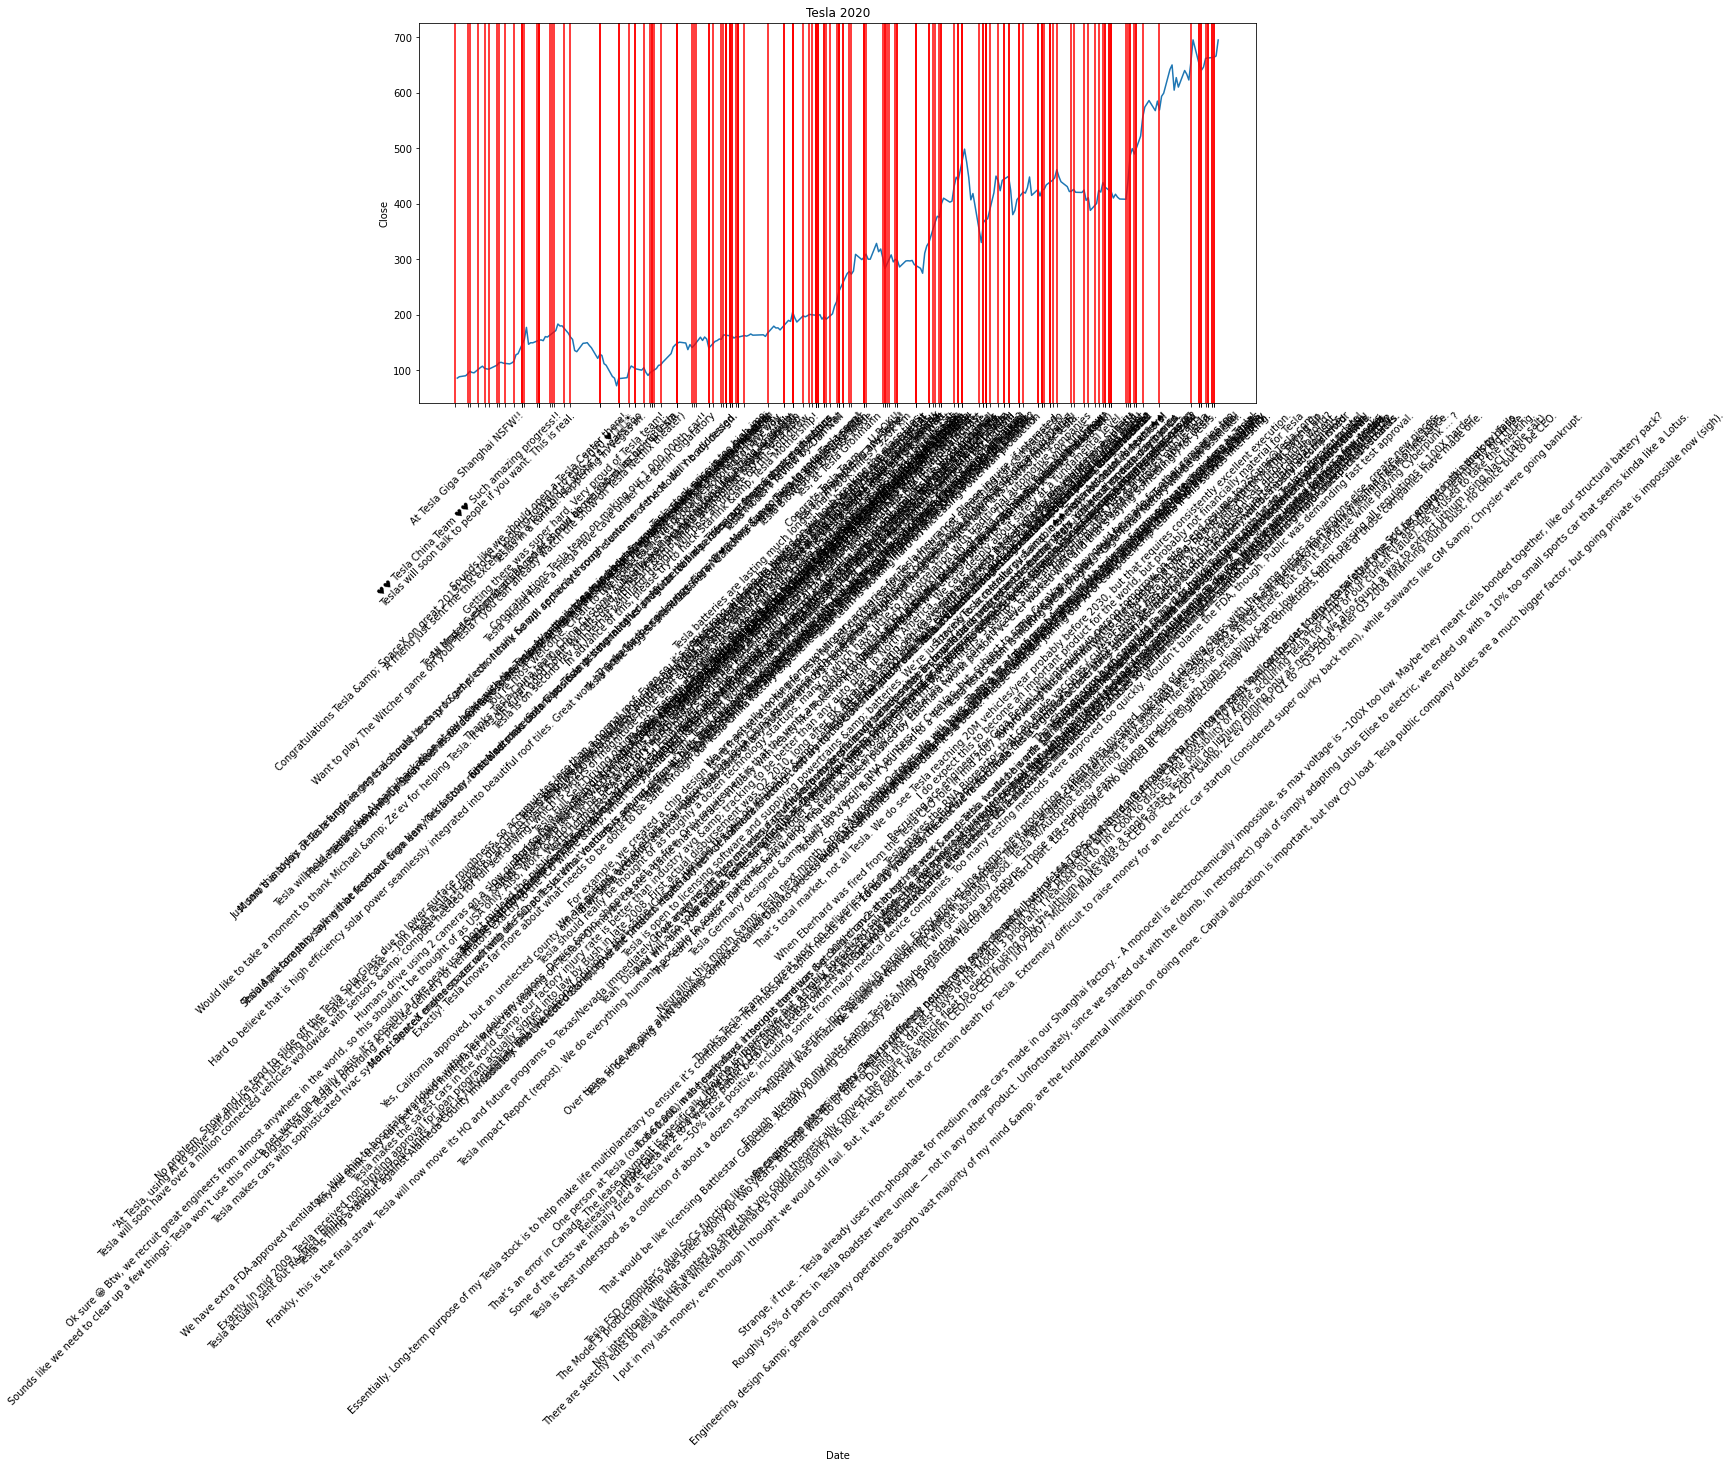

In [20]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=tesla_price2020["Date"], y=tesla_price2020["Close"])
for i in tesla2020.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticklabels(tesla2020.Tweet, rotation=45)
ax.set_xticks(tesla2020.Date) 
ax.set_title("Tesla 2020")

# x = pd.Timestamp('2019-04-02')
# plt.axvline(x,color='r')
# ax.annotate('Dogecoin rulz', xy =(x, 0.00225),xytext =(x,0.00225))

In [21]:
tesla_price2020Q1 = tesla_price.loc[(tesla_price['Date'] >= '2020-01-01')
                     & (tesla_price['Date'] < '2020-03-31')]
tesla_price2020Q1

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2450,2020-03-24,95.459999,102.737999,94.800003,101.000000,101.000000,114476000
2451,2020-03-25,109.050003,111.400002,102.222000,107.849998,107.849998,106113500
2452,2020-03-26,109.477997,112.000000,102.449997,105.632004,105.632004,86903500
2453,2020-03-27,101.000000,105.160004,98.806000,102.872002,102.872002,71887000


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Tesla 2020 Q1')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3

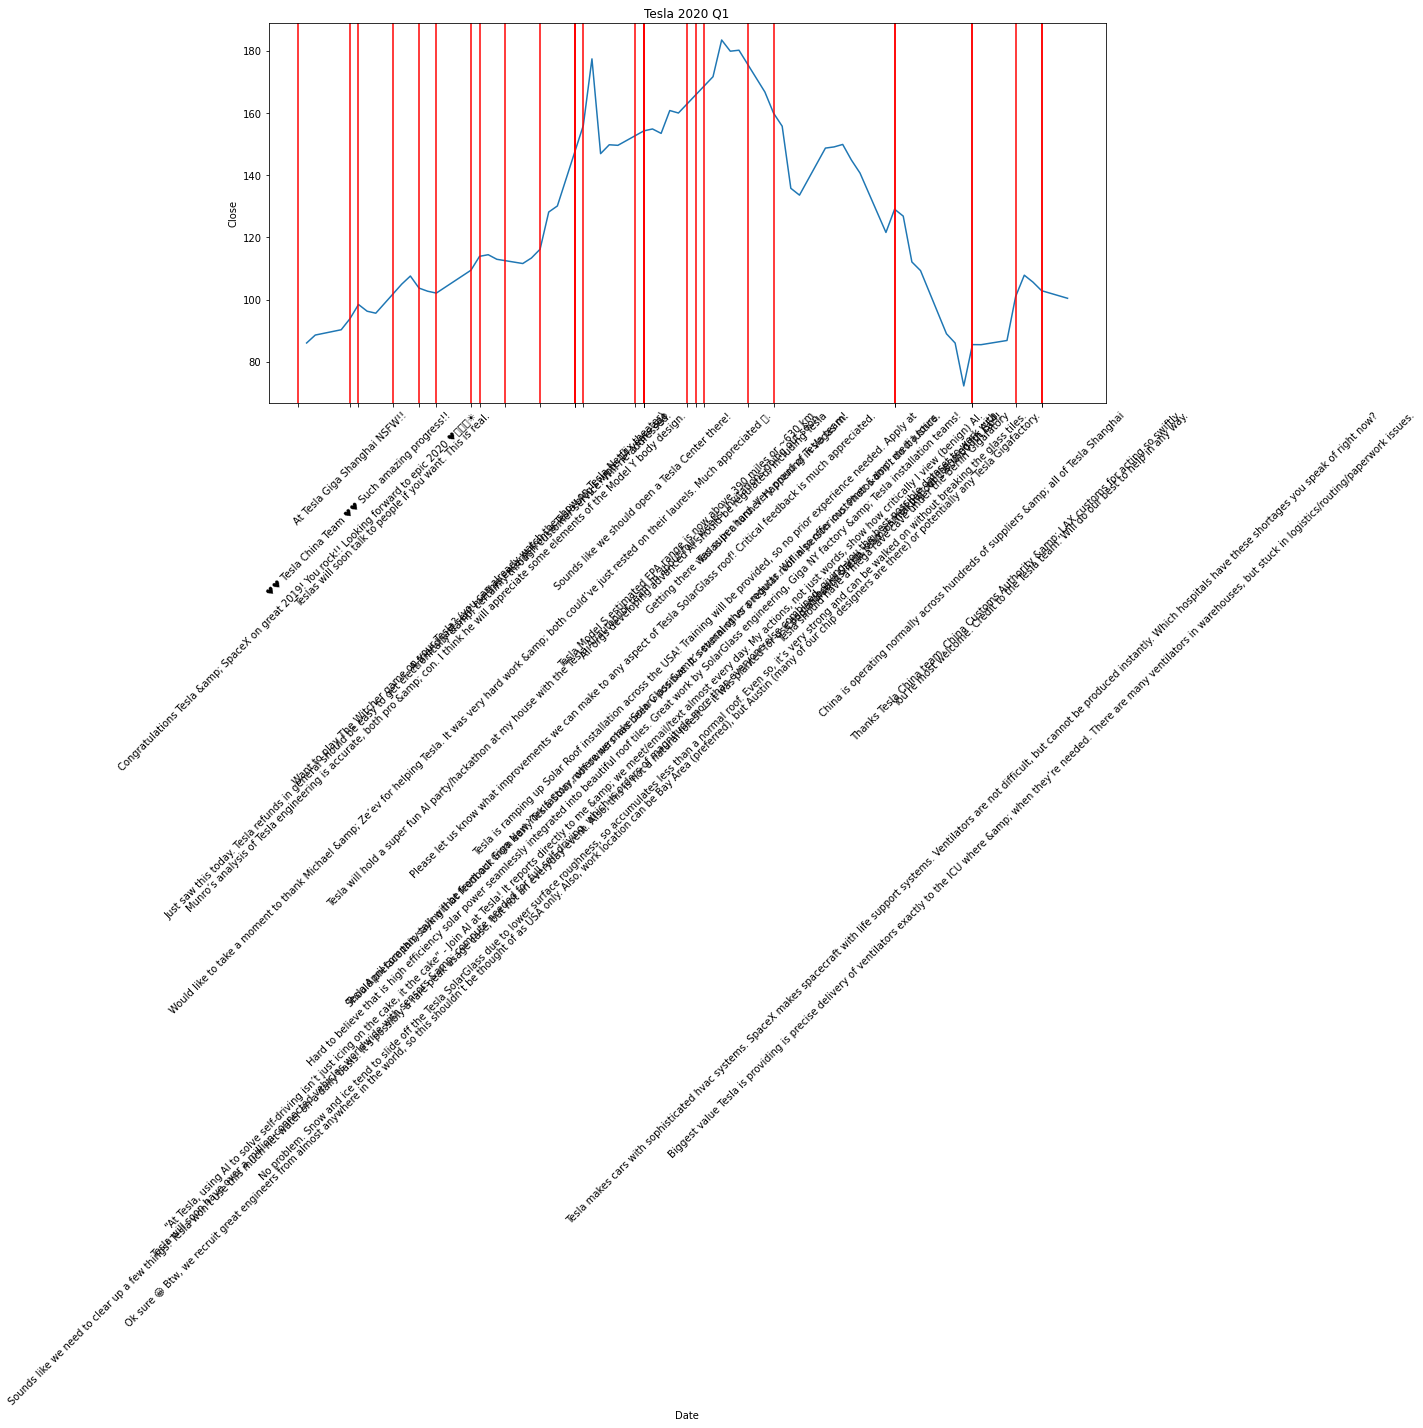

In [22]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=tesla_price2020Q1["Date"], y=tesla_price2020Q1["Close"])
for i in tesla2020Q1.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticklabels(tesla2020Q1.Tweet, rotation=45)
ax.set_xticks(tesla2020Q1.Date) 
ax.set_title("Tesla 2020 Q1")

In [23]:
tesla2021 = tesla_txtblob.loc[(tesla_txtblob['Date'] >= '2021-01-01')
                     & (tesla_txtblob['Date'] < '2021-12-31')]
tesla2021

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
1244,2021-01-02,Tesla Full Self-Driving will work at a safety ...,20211.0,NaN,NaN,NaN,663.0,894.0,0.470833,0.175000,Positive
1245,2021-01-02,So proud of the Tesla team for achieving this ...,106990.0,NaN,NaN,NaN,4026.0,6002.0,0.750000,0.439063,Positive
1246,2021-01-02,Tesla is responsible for 2/3 of all the person...,12858.0,NaN,NaN,NaN,630.0,659.0,0.262500,0.150000,Positive
1247,2021-01-09,One of the best Tesla Solar Roof installations,2670.0,NaN,NaN,NaN,118.0,95.0,0.300000,1.000000,Positive
1248,2021-01-10,Maybe a Tesla AI day later this year,5009.0,NaN,NaN,NaN,256.0,382.0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1438,2021-12-24,Tesla is technically a car like an iPhone is t...,19707.0,NaN,NaN,NaN,1169.0,1371.0,0.100000,0.000000,Neutral
1439,2021-12-24,Tesla holiday software update goes to wide rel...,114262.0,NaN,NaN,NaN,8557.0,5580.0,0.400000,-0.125000,Negative
1440,2021-12-25,That was a crazy tough year. Tesla financing c...,7317.0,NaN,NaN,NaN,466.0,417.0,0.494444,-0.181481,Negative
1441,2021-12-26,Or Tesla!,61659.0,NaN,NaN,NaN,2192.0,1556.0,0.000000,0.000000,Neutral


In [24]:
tesla2021.sort_values(by=['retweets_count'], inplace=True, ascending=False)
tesla2021

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
1271,2021-03-24,You can now buy a Tesla with Bitcoin,865043.0,NaN,NaN,NaN,34764.0,107869.0,0.000000,0.000000,Neutral
1294,2021-05-11,Do you want Tesla to accept Doge?,392471.0,NaN,NaN,NaN,96563.0,94898.0,0.000000,0.000000,Neutral
1295,2021-05-13,Tesla &amp; Bitcoin,491785.0,NaN,NaN,NaN,120523.0,73792.0,0.000000,0.000000,Neutral
1400,2021-10-31,If WFP can describe on this Twitter thread exa...,332993.0,NaN,NaN,NaN,13288.0,58876.0,0.392857,0.267857,Positive
1297,2021-05-19,Tesla has 💎 🙌,452335.0,NaN,NaN,NaN,68672.0,55180.0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1320,2021-07-02,"These days, I mostly just play Polytopia, whic...",2116.0,NaN,NaN,NaN,204.0,135.0,0.650000,0.500000,Positive
1369,2021-09-18,Probably will trap a Tesla with the production...,3633.0,NaN,NaN,NaN,170.0,132.0,0.000000,0.000000,Neutral
1321,2021-07-02,"When we need strange training examples, eg hal...",1350.0,NaN,NaN,NaN,110.0,102.0,0.611111,0.138889,Positive
1362,2021-09-10,"Tesla doesn’t have the bandwidth to do it, but...",2388.0,NaN,NaN,NaN,176.0,98.0,0.333333,0.300000,Positive


In [25]:
x = tesla2021.groupby(["Date"],as_index = False)
x

In [26]:
top = tesla2021.sort_values("likes_count", ascending=False)[["Date","Tweet"]][:5]
top

,Date,Tweet
1271,2021-03-24,You can now buy a Tesla with Bitcoin
1295,2021-05-13,Tesla &amp; Bitcoin
1297,2021-05-19,Tesla has 💎 🙌
1252,2021-02-07,Time to tell the story of Tesla &amp; SpaceX
1294,2021-05-11,Do you want Tesla to accept Doge?


In [27]:
top.groupby(["Date"])["Tweet"]

In [29]:
tesla2021_vader = tesla_vader.loc[(tesla_vader['Date'] >= '2021-01-01')
                     & (tesla_vader['Date'] < '2021-12-31')]
tesla2021_vader

,Unnamed: 0,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
1244,1244,2021-01-02,Tesla Full Self-Driving will work at a safety ...,20211.0,NaN,NaN,NaN,663.0,894.0,0.7964,0.000,0.740,0.260
1245,1245,2021-01-02,So proud of the Tesla team for achieving this ...,106990.0,NaN,NaN,NaN,4026.0,6002.0,0.7836,0.000,0.745,0.255
1246,1246,2021-01-02,Tesla is responsible for 2/3 of all the person...,12858.0,NaN,NaN,NaN,630.0,659.0,0.2144,0.089,0.745,0.166
1247,1247,2021-01-09,One of the best Tesla Solar Roof installations,2670.0,NaN,NaN,NaN,118.0,95.0,0.6369,0.000,0.625,0.375
1248,1248,2021-01-10,Maybe a Tesla AI day later this year,5009.0,NaN,NaN,NaN,256.0,382.0,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1438,2021-12-24,Tesla is technically a car like an iPhone is t...,19707.0,NaN,NaN,NaN,1169.0,1371.0,0.3612,0.000,0.783,0.217
1439,1439,2021-12-24,Tesla holiday software update goes to wide rel...,114262.0,NaN,NaN,NaN,8557.0,5580.0,0.4574,0.000,0.728,0.272
1440,1440,2021-12-25,That was a crazy tough year. Tesla financing c...,7317.0,NaN,NaN,NaN,466.0,417.0,-0.4404,0.130,0.870,0.000
1441,1441,2021-12-26,Or Tesla!,61659.0,NaN,NaN,NaN,2192.0,1556.0,0.0000,0.000,1.000,0.000


In [30]:
tesla_price2021 = tesla_price.loc[(tesla_price['Date'] >= '2021-01-01')
                     & (tesla_price['Date'] < '2021-12-31')]
tesla_price2021

,Date,Open,High,Low,Close,Adj Close,Volume
2647,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2648,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2649,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2650,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2651,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500
...,...,...,...,...,...,...,...
2893,2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2894,2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2895,2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000
2896,2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Tesla 2021')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0, flags=flags)


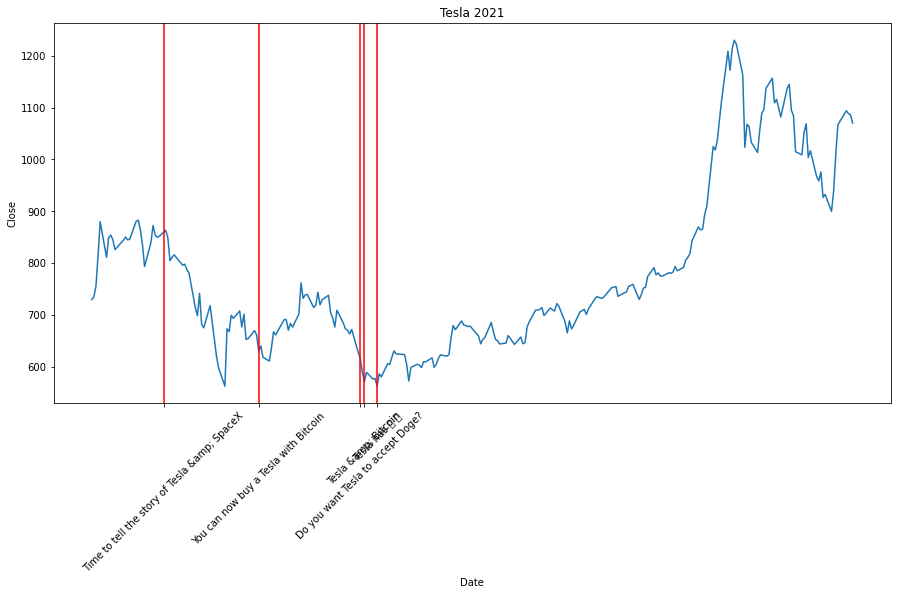

In [31]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=tesla_price2021["Date"], y=tesla_price2021["Close"])
for i in top.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticklabels(top.Tweet, rotation=45)
ax.set_xticks(top.Date) 
ax.set_title("Tesla 2021")


In [32]:
tesla_vader.dtypes

Unnamed: 0          int64
Date               object
Tweet              object
likes_count       float64
nlikes            float64
nreplies          float64
nretweets         float64
replies_count     float64
retweets_count    float64
compound_sc       float64
negative_sc       float64
neutral_sc        float64
positive_sc       float64
dtype: object

In [33]:
tesla_vader['Date'] = pd.to_datetime(tesla_vader['Date'], format='%Y-%m-%d')

In [34]:
joint_df = pd.merge(tesla_vader,tesla_price, how = "left", left_on=["Date"], right_on=["Date"])
joint_df

,Unnamed: 0,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc,Open,High,Low,Close,Adj Close,Volume
0,0,2011-12-31,Hacked my Tesla charge connector on a small is...,NaN,405.0,55.0,32.0,NaN,NaN,-0.4019,0.172,0.828,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012-01-11,The exec conf room at Tesla used to be called ...,NaN,315.0,32.0,67.0,NaN,NaN,0.6616,0.000,0.826,0.174,5.52400,5.676000,5.460000,5.646000,5.646000,3361500.0
2,2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",NaN,15.0,5.0,51.0,NaN,NaN,0.0000,0.000,1.000,0.000,5.68000,5.700000,4.528000,4.558000,4.558000,27502000.0
3,3,2012-01-17,That's not just paranoia (a healthy trait at t...,NaN,16.0,23.0,14.0,NaN,NaN,0.0875,0.138,0.665,0.197,5.32400,5.468000,5.282000,5.320000,5.320000,23258000.0
4,4,2012-01-17,Will communicate better in the future. Too man...,NaN,163.0,44.0,43.0,NaN,NaN,-0.0772,0.122,0.732,0.146,5.32400,5.468000,5.282000,5.320000,5.320000,23258000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1481,2022-03-03,"By the way, Tesla factory worker compensation ...",5478.0,NaN,NaN,NaN,215.0,591.0,0.0000,0.000,1.000,0.000,878.77002,886.440002,832.599976,839.289978,839.289978,20541200.0
1482,1482,2022-03-03,This old YouTube clip helps explain why former...,3387.0,NaN,NaN,NaN,220.0,450.0,0.1625,0.087,0.798,0.115,878.77002,886.440002,832.599976,839.289978,839.289978,20541200.0
1483,1483,2022-03-03,Our real challenge is Bay Area has negative un...,6839.0,NaN,NaN,NaN,384.0,719.0,0.3777,0.130,0.665,0.206,878.77002,886.440002,832.599976,839.289978,839.289978,20541200.0
1484,1484,2022-03-05,"Obviously, this would negatively affect Tesla,...",155206.0,NaN,NaN,NaN,4090.0,16131.0,0.5719,0.000,0.817,0.183,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
final_tesla_df = joint_df[["Date","Close","Volume","compound_sc","negative_sc","neutral_sc","positive_sc"]]
final_tesla_df

,Date,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,2011-12-31,NaN,NaN,-0.4019,0.172,0.828,0.000
1,2012-01-11,5.646000,3361500.0,0.6616,0.000,0.826,0.174
2,2012-01-13,4.558000,27502000.0,0.0000,0.000,1.000,0.000
3,2012-01-17,5.320000,23258000.0,0.0875,0.138,0.665,0.197
4,2012-01-17,5.320000,23258000.0,-0.0772,0.122,0.732,0.146
...,...,...,...,...,...,...,...
1481,2022-03-03,839.289978,20541200.0,0.0000,0.000,1.000,0.000
1482,2022-03-03,839.289978,20541200.0,0.1625,0.087,0.798,0.115
1483,2022-03-03,839.289978,20541200.0,0.3777,0.130,0.665,0.206
1484,2022-03-05,NaN,NaN,0.5719,0.000,0.817,0.183


In [36]:
final_tesla_df.set_index("Date",inplace = True)
final_tesla_df

,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
Date,,,,,,
2011-12-31,NaN,NaN,-0.4019,0.172,0.828,0.000
2012-01-11,5.646000,3361500.0,0.6616,0.000,0.826,0.174
2012-01-13,4.558000,27502000.0,0.0000,0.000,1.000,0.000
2012-01-17,5.320000,23258000.0,0.0875,0.138,0.665,0.197
2012-01-17,5.320000,23258000.0,-0.0772,0.122,0.732,0.146
...,...,...,...,...,...,...
2022-03-03,839.289978,20541200.0,0.0000,0.000,1.000,0.000
2022-03-03,839.289978,20541200.0,0.1625,0.087,0.798,0.115
2022-03-03,839.289978,20541200.0,0.3777,0.130,0.665,0.206


In [37]:
def train_test_split(df, test_size=0.3):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(final_tesla_df, test_size=0.2)

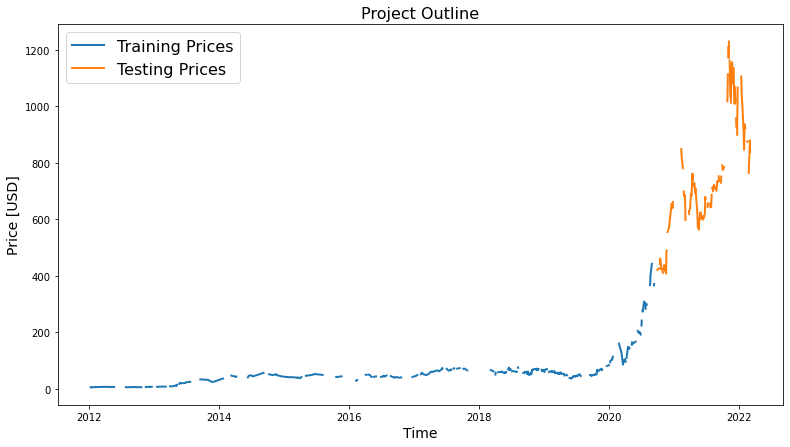

In [38]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Price [USD]', fontsize=14)
    ax.set_xlabel('Time', fontsize = 14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train["Close"], test["Close"], 'Training Prices', 'Testing Prices', title='Project Outline')

In [ ]:
train

In [ ]:
test